## Evaluating Models and Predicting Diamond Prices Using KNeighbors Regressor

In [1]:
# import necessary libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

diamond = pd.read_csv("D:\\DataSets For Practice\\diamonds.csv"  )
diamond_head = diamond.head(10)
print(diamond_head)

   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


### Pre processing

In [3]:
# Check for missing values

print(diamond.isnull().sum()) 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [4]:
 # summary of the dataset

print(diamond.describe())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [5]:
# getting the shape of the dataset
print(diamond.shape)

(53940, 10)


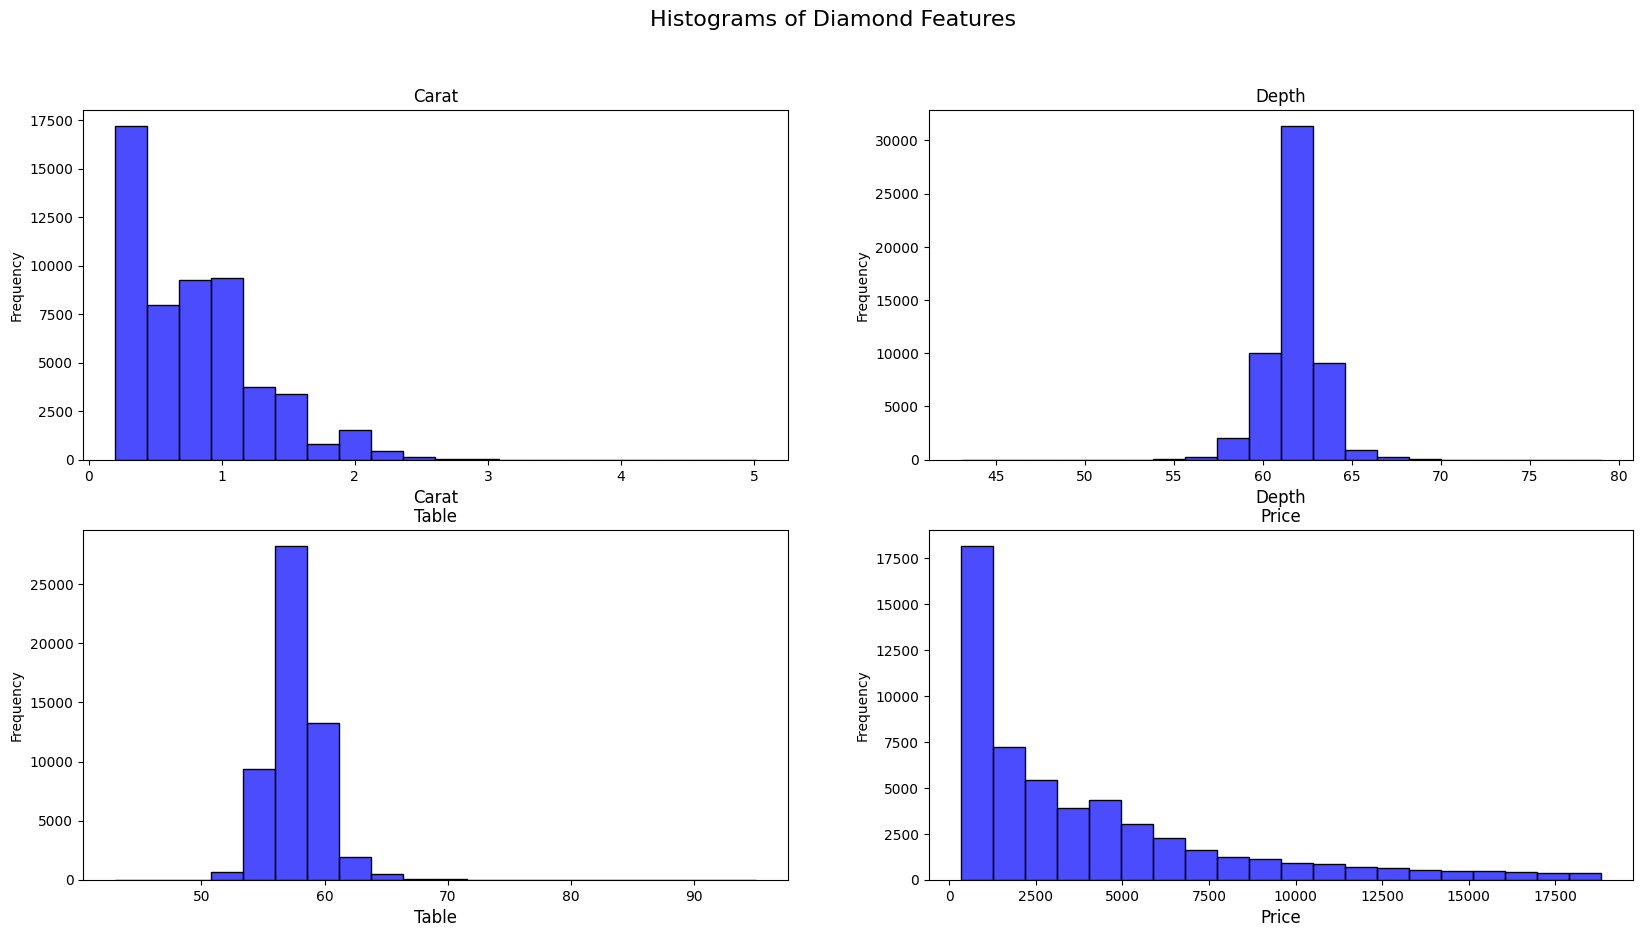

In [6]:
# Visualization of the dataset lets start with  histograms

fig , axis = plt.subplots(2, 2, figsize=(20, 10))
plt.suptitle('Histograms of Diamond Features', fontsize=16)

cols = ['carat', 'depth', 'table', 'price']
# selecting the columns to plot
for i, col in enumerate(cols):
    ax = axis[i // 2, i % 2]
    sns.histplot(diamond[col], bins=20,  ax=axis[i // 2, i % 2] , color='blue', alpha=0.7,)
    ax.set_title(col.capitalize())
    ax.set_xlabel(col.capitalize(), fontsize=12)
    ax.set_ylabel('Frequency')
  

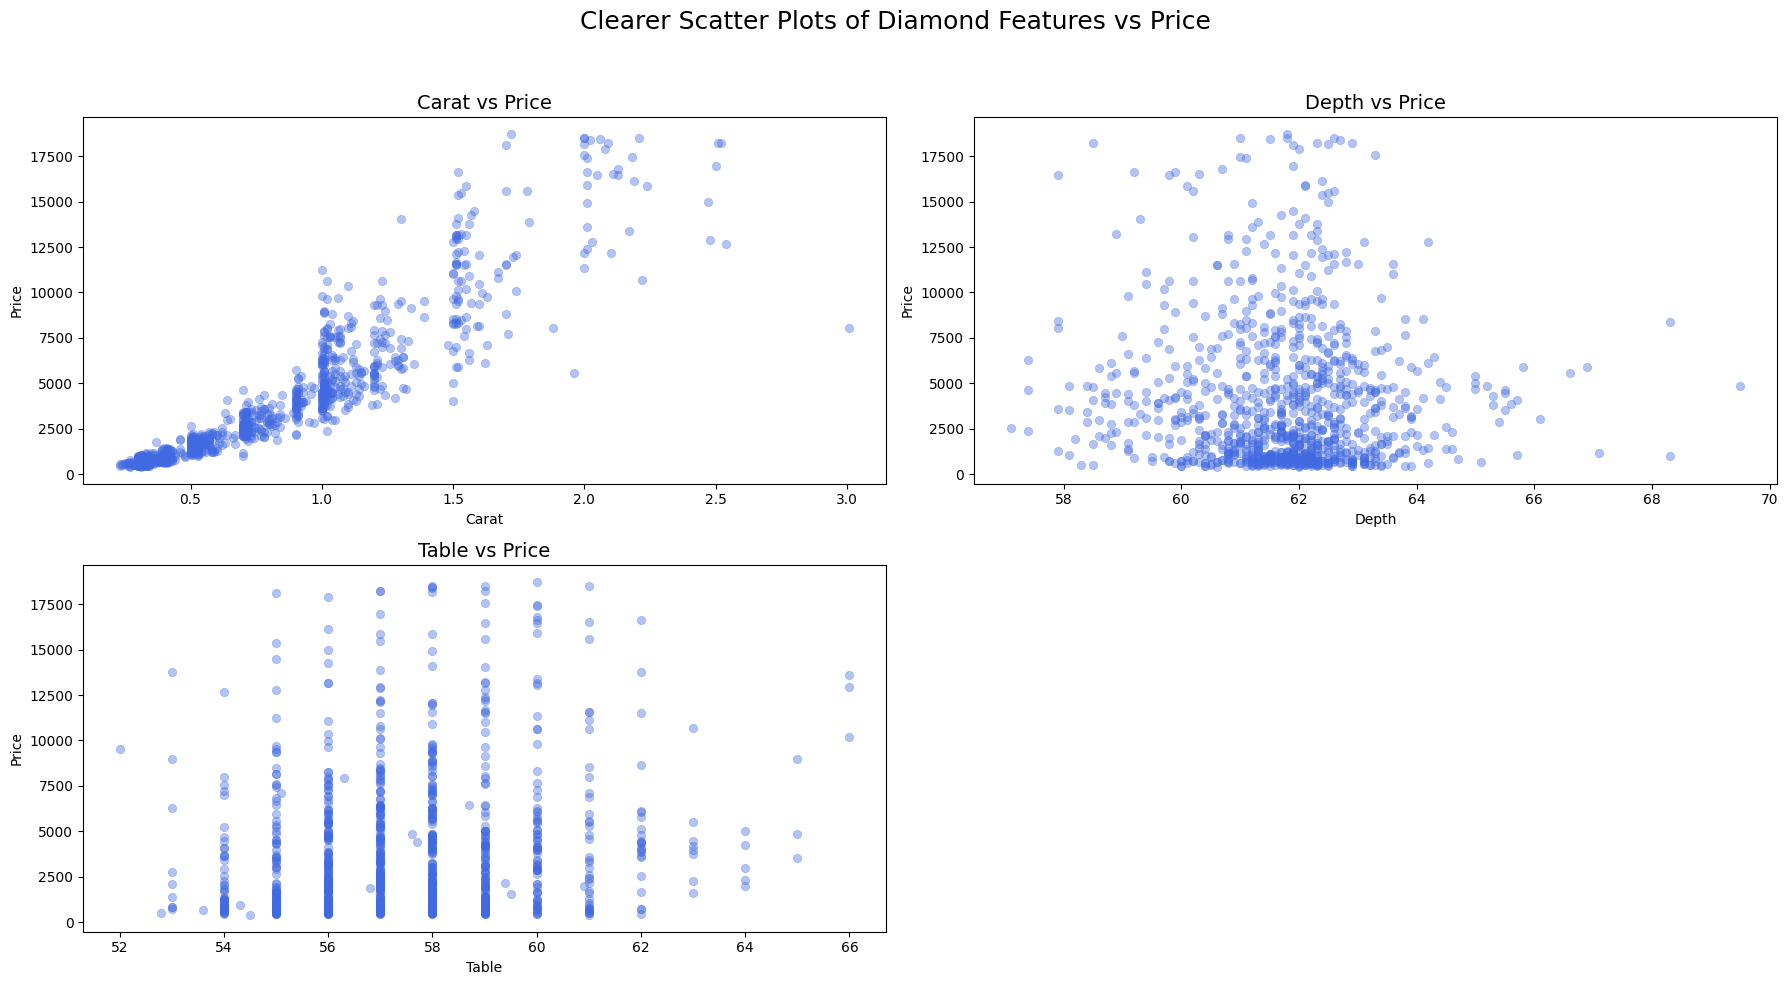

In [7]:
# Scatter plots for better understanding of the relationship between features and price
# Sample the data
sampled_data = diamond.sample(1000, random_state=1)

fig, axis = plt.subplots(2, 2, figsize=(18, 10))
plt.suptitle('Clearer Scatter Plots of Diamond Features vs Price', fontsize=18)

features = ['carat', 'depth', 'table']

for i, feature in enumerate(features):
    ax = axis[i // 2, i % 2]
    sns.scatterplot(x=sampled_data[feature], y=sampled_data['price'],
                    ax=ax, color='royalblue', alpha=0.4, edgecolor=None)
    ax.set_title(f'{feature.capitalize()} vs Price', fontsize=14)
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Price')

# Hide unused subplot
if len(features) < 4:
    axis[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



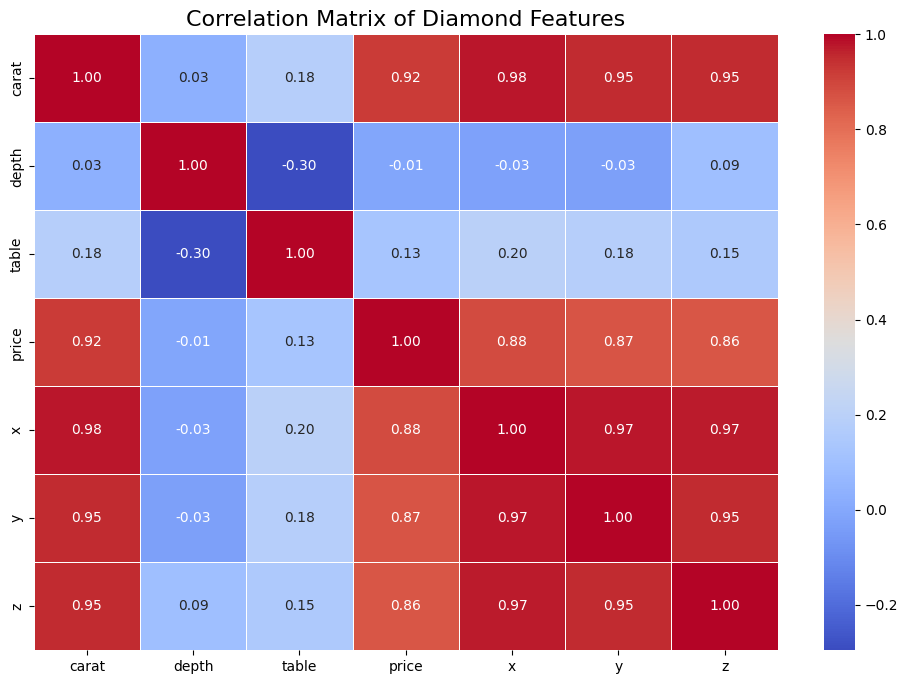

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


In [8]:
# lets correlate the features of the dataset
correlation_matrix = diamond.corr(numeric_only= True)    

# plotting the correlation matrix
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Diamond Features', fontsize=16)
plt.show()
print(correlation_matrix)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_6588\2095594640.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x.carat.fillna(value=x["carat"].mean(),inplace=True)


                   Model  Mean Absolute Error  Mean Squared Error  R-squared
0       LinearRegression           848.896145        1.643866e+06   0.896592
1  DecisionTreeRegressor           557.647723        1.154478e+06   0.927377
2    KNeighborsRegressor           565.094698        1.119933e+06   0.929550


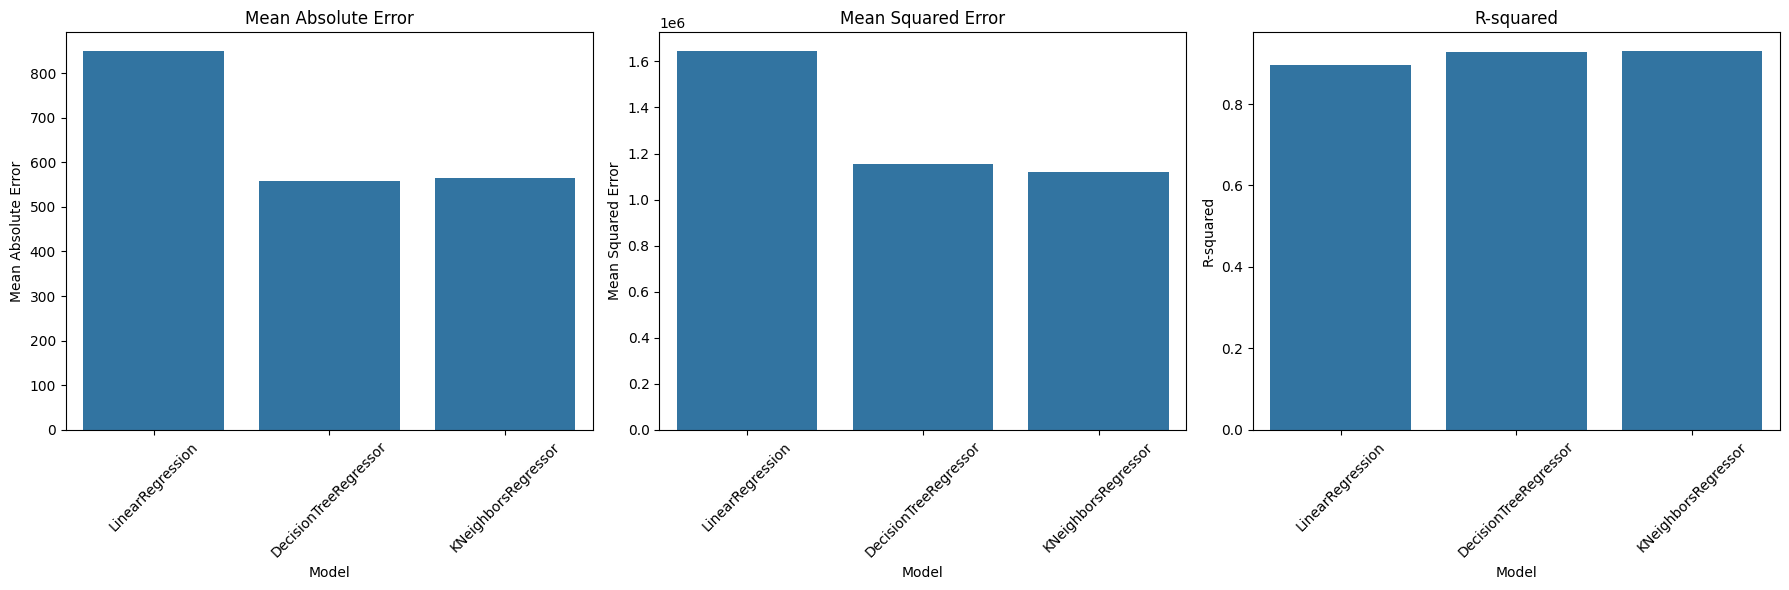

In [9]:
# Selecting features for regression & preparing the data

x = diamond[["carat","cut" , "clarity"]]
y = diamond["price"]
x = pd.get_dummies(x, columns=["cut","clarity"])
x.carat.fillna(value=x["carat"].mean(),inplace=True)

# Importing necessary libraries for regression models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state=42)

# Training and evaluating different regression models

models = [LinearRegression(),
          DecisionTreeRegressor(),
          KNeighborsRegressor()]
model_names = ["Linear Regression",
               "Decision Tree Regressor",
               "K-Nearest Neighbors Regressor",]
model_scores = []
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores.append({
        "Model": model.__class__.__name__,
        "Mean Absolute Error": mae,
        "Mean Squared Error": mse,
        "R-squared": r2
    })

# printing the model scores
model_scores_df = pd.DataFrame(model_scores)
print(model_scores_df)

# Plotting the model scores
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Model', y='Mean Absolute Error', data=model_scores_df, ax=axes[0])
axes[0].set_title('Mean Absolute Error')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='Mean Squared Error', data=model_scores_df, ax=axes[1])
axes[1].set_title('Mean Squared Error')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='R-squared', data=model_scores_df, ax=axes[2])
axes[2].set_title('R-squared')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### i would prefer to use KNeighbors Regressor for this task because of MSE and R-squared values are better than other models and K Neighbors Regressor is a non-parametric method that can capture complex relationships in the data without assuming a specific form for the relationship between features and target variable.

In [ ]:
# Predicting Diamond Prices Using KNeighbors Regressor

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Select only 3 features
features = diamond[['carat', 'cut', 'clarity']]
target = diamond['price']

# One-hot encode categorical columns
features_encoded = pd.get_dummies(features, columns=['cut', 'clarity'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

# Train the regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import d2_absolute_error_score , r2_score
abs_error = d2_absolute_error_score(y_test, y_pred)
print(f'Absolute Error: {abs_error}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Absolute Error: 0.7971780181769175
R-squared: 0.9294074451591846


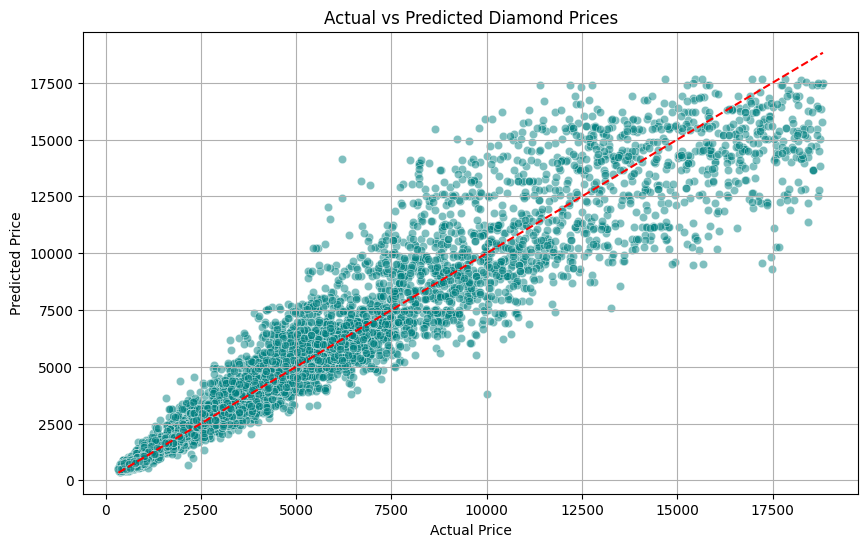

In [11]:
# Visualizing the results & plotting the actual vs predicted prices

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Diamond Prices')
plt.grid(True)
plt.show()


In [12]:
# This code allows users to input carat, cut, and clarity to predict diamond price
#  User Input Section

carat = float(input("Enter the carat weight of the diamond (e.g. 1.0): "))
cut = input("Enter the cut quality (Fair, Good, Very Good, Premium, Ideal): ")
clarity = input("Enter the clarity grade (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF): ")

# Prepare user input as DataFrame
user_input = pd.DataFrame([{'carat': carat, 'cut': cut, 'clarity': clarity}])
user_encoded = pd.get_dummies(user_input, columns=['cut', 'clarity'])

# Match training columns (fill missing ones with 0)
user_encoded = user_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict the price
predicted_price = model.predict(user_encoded)[0]
print(f"\n💎 Estimated Diamond Price: ${predicted_price:,.2f}")



💎 Estimated Diamond Price: $14,972.60
